# ITS 2130-Machine Learning Assignment

## A

###  1 Clean The Dataset (Handle Missing Value and Outliers)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy.stats as stats

#### loard data

In [7]:
import pandas as pd
bank_data = pd.read_csv('banking.csv')
bank_data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


#### inspect the dataset

In [14]:
#print(bank_data.head())  #display the first five rows
#print(bank_data.columns) #display the coloumn
#print(bank_data.info()) #display basic information
#print(bank_data.describe())
#bank_data.head()
bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

#### check for Null data

In [15]:
print(bank_data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [17]:
clean_data = bank_data.dropna();
clean_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [18]:
print(clean_data.isnull().sum());

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


### check duplicate rows

In [19]:
print(clean_data.duplicated().sum());

12


In [20]:
clean_data=clean_data.drop_duplicates();
clean_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [21]:
print(clean_data.duplicated().sum());


0


#### Save the cleaned dataset

In [22]:
clean_data.to_csv('clean_banking_data.csv', index=False)

### Using Clean Data Set

In [41]:
import pandas as pd
clean_bank_data = pd.read_csv('clean_banking_data.csv')
clean_bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41172,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41173,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41174,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


### handle outiers

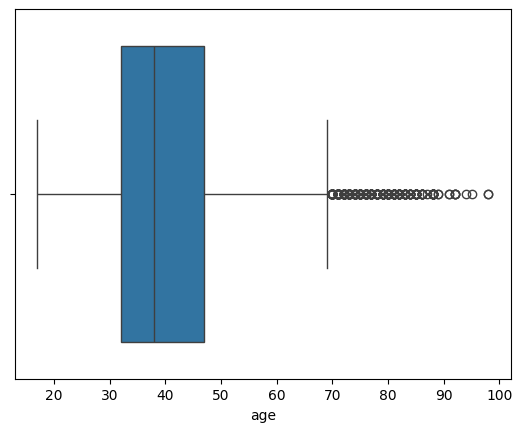

In [40]:
# Assuming age is a relevant feature to check for outliers
import seaborn as sns
sns.boxplot(x=clean_bank_data['age'])
plt.show()

# Removing outliers (if any)
Q1 = clean_bank_data['age'].quantile(0.25)
Q3 = clean_bank_data['age'].quantile(0.75)
IQR = Q3 - Q1
df = clean_bank_data[~((clean_bank_data['age'] < (Q1 - 1.5 * IQR)) | (clean_bank_data['age'] > (Q3 + 1.5 * IQR)))]

#### Produce Q-Q Plots and Histograms for the features

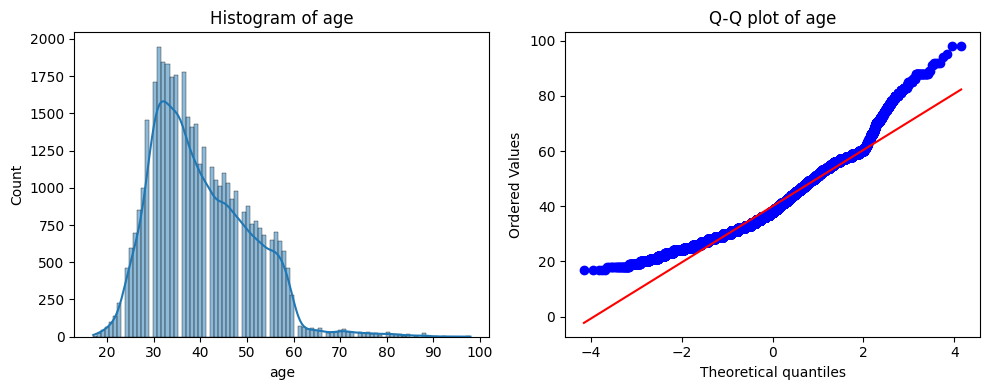

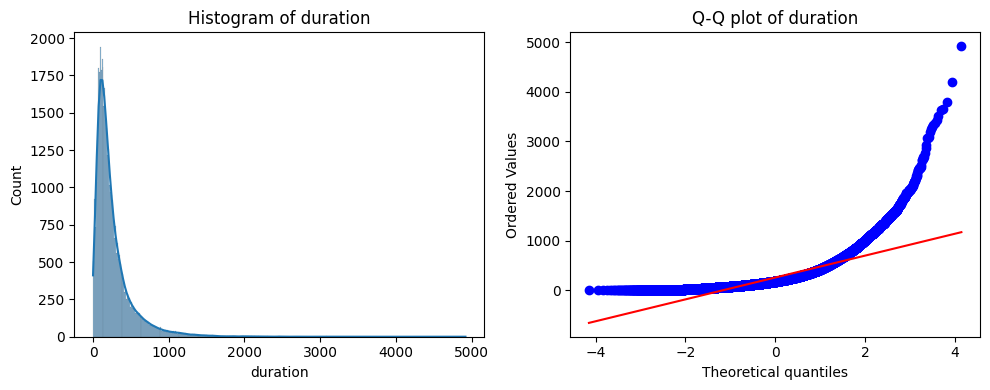

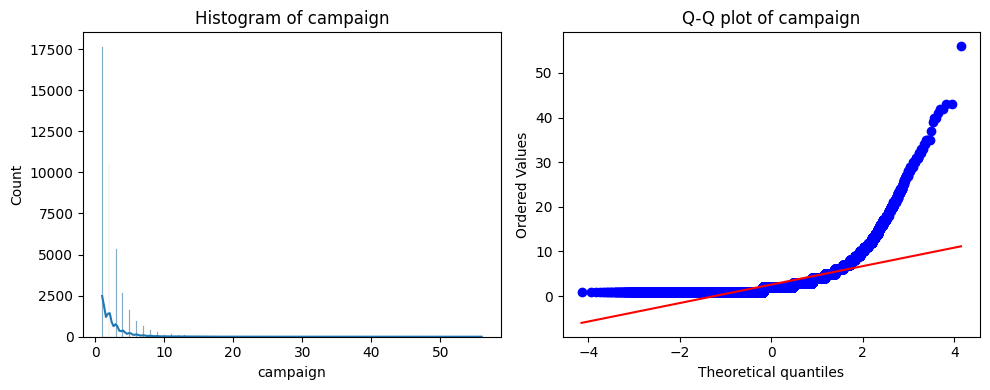

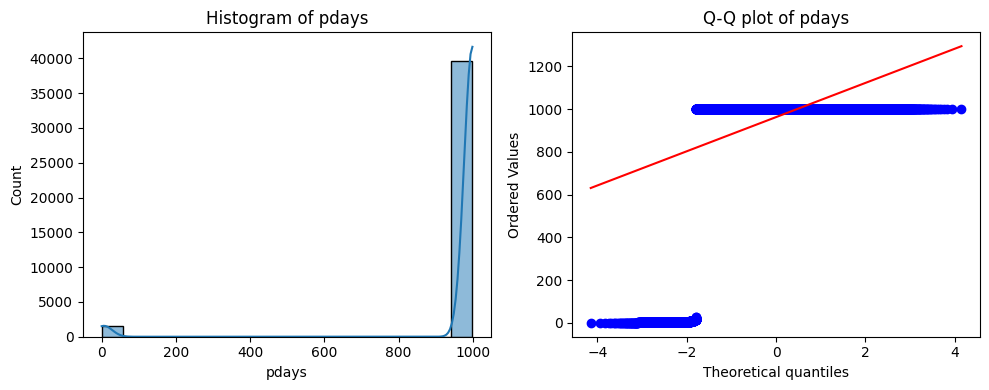

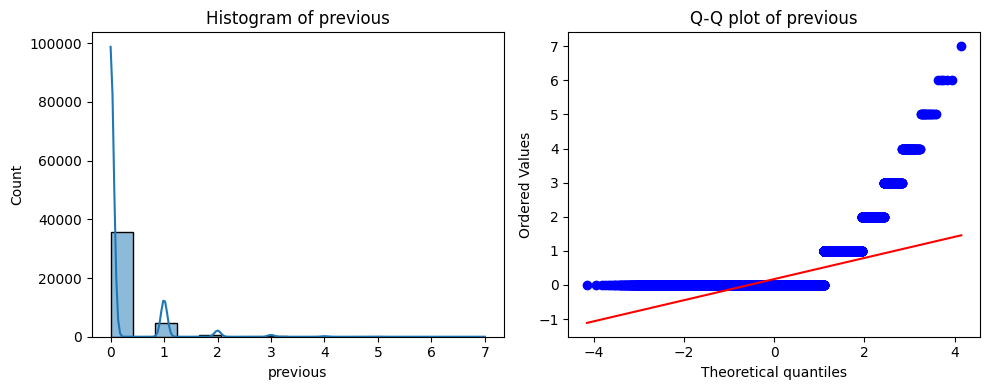

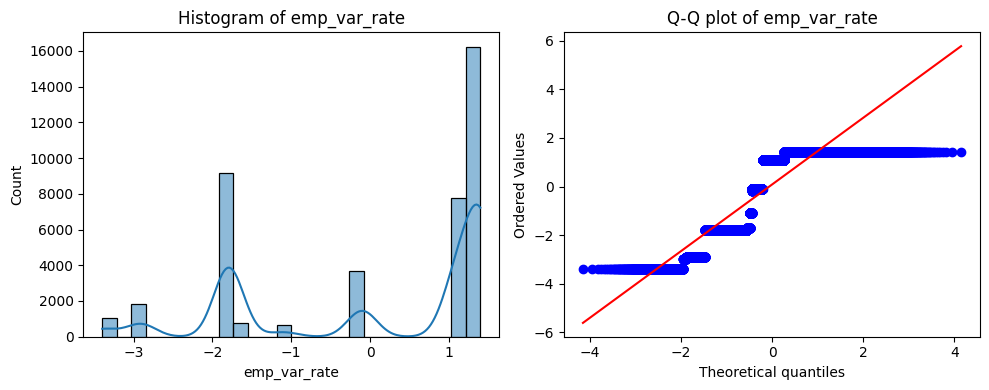

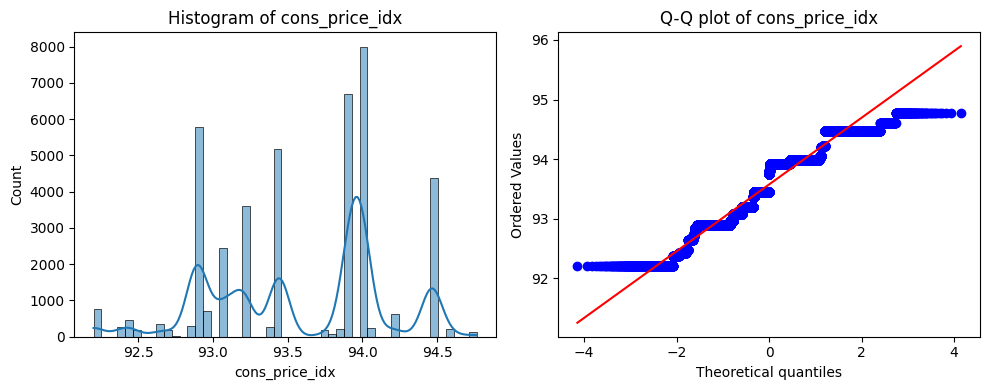

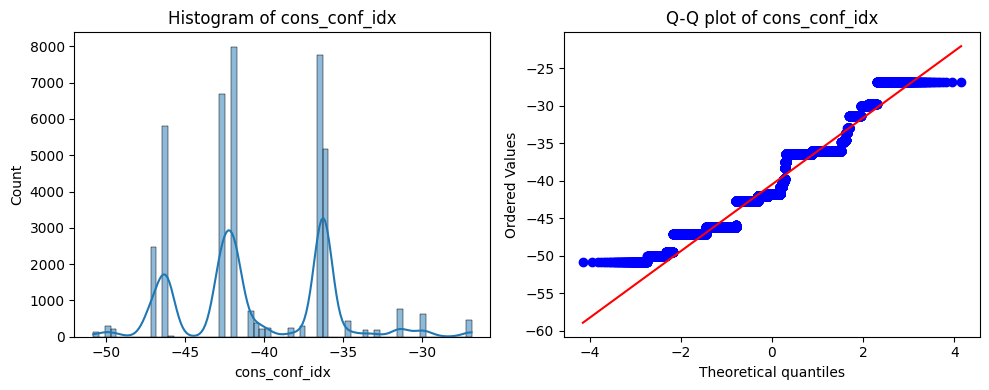

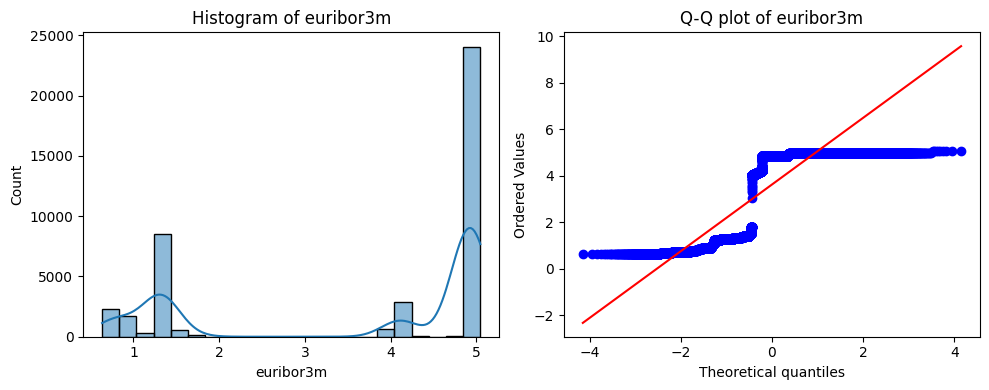

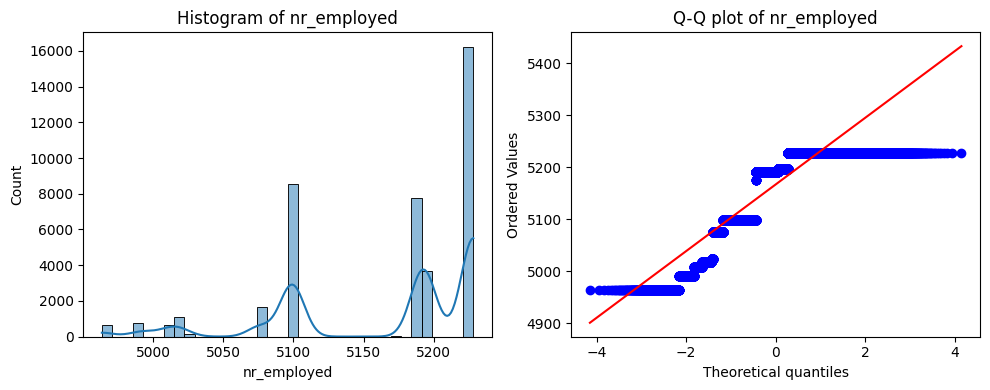

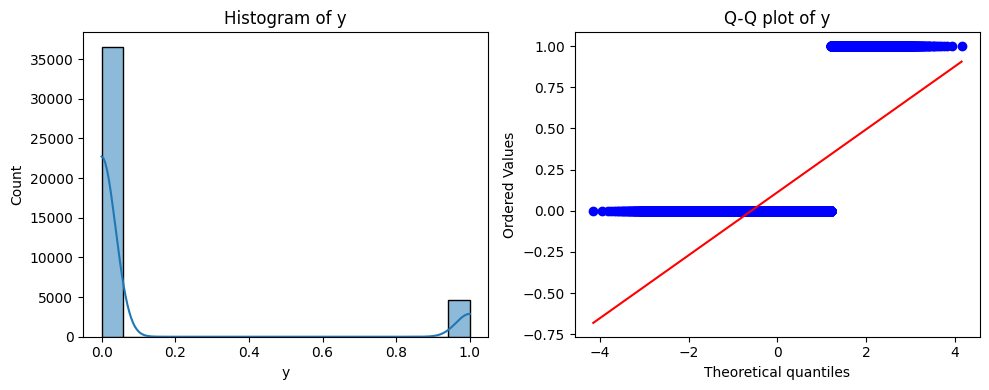

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Ensure 'data' is a DataFrame
# data = your_dataframe

# Produce Q-Q plots and histograms for numerical features
for col in clean_bank_data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(clean_bank_data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.subplot(1, 2, 2)
    stats.probplot(clean_bank_data[col], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {col}')
    plt.tight_layout()
    plt.show()

### Apply Suitable Coading Techniques

In [9]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    clean_bank_data[column] = le.fit_transform(clean_bank_data[column])
    label_encoders[column] = le

### stadardizing the feature

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clean_bank_data_scaled = scaler.fit_transform(clean_bank_data.drop(columns=['y']))
clean_bank_data_scaled

array([[ 0.3815728 , -0.7578935 , -0.28370335, ...,  0.95139369,
         0.77357831,  0.84518642],
       [ 1.24525055,  1.46778143, -0.28370335, ..., -0.32350911,
         0.230456  ,  0.39813061],
       [-1.1538543 ,  0.0767346 ,  1.35860919, ...,  0.15187838,
        -1.66758929, -2.42814793],
       ...,
       [ 0.18964441, -1.03610287,  1.35860919, ...,  0.88656813,
         0.71246263,  0.33169507],
       [ 0.76542958,  1.46778143, -0.28370335, ...,  2.93937773,
        -1.66009397, -2.06967284],
       [-1.44174688,  1.18957207,  1.35860919, ...,  0.88656813,
         0.71361576,  0.33169507]])

### Show scaling effect


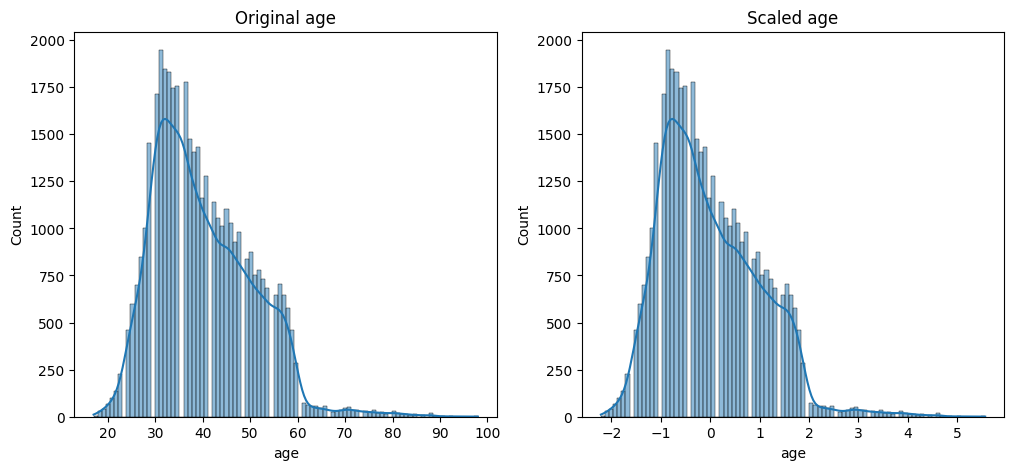

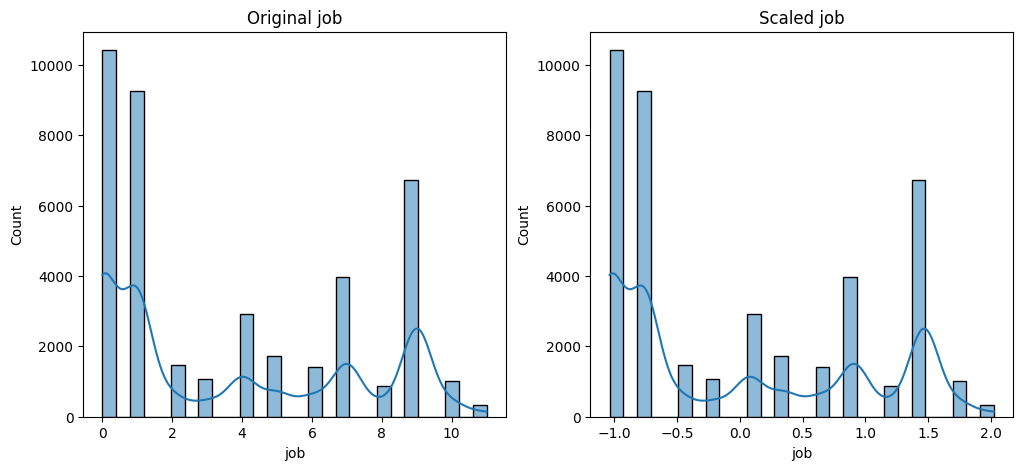

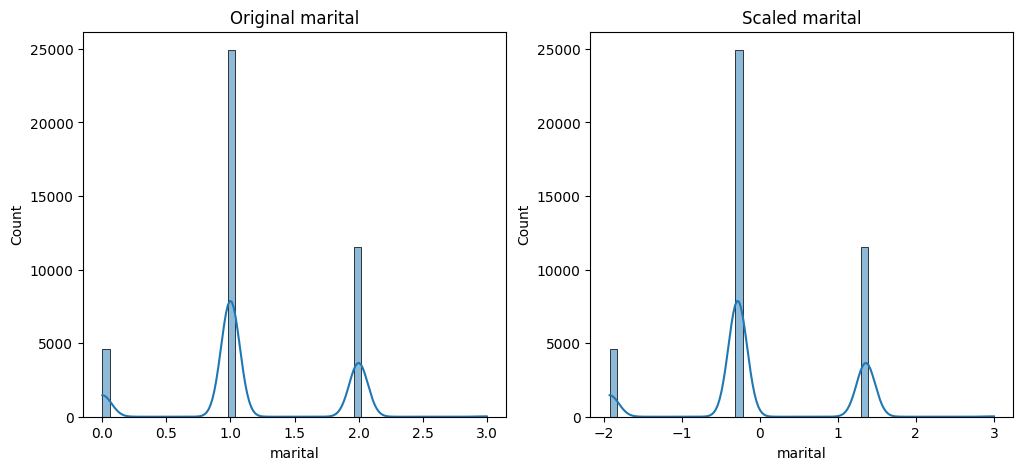

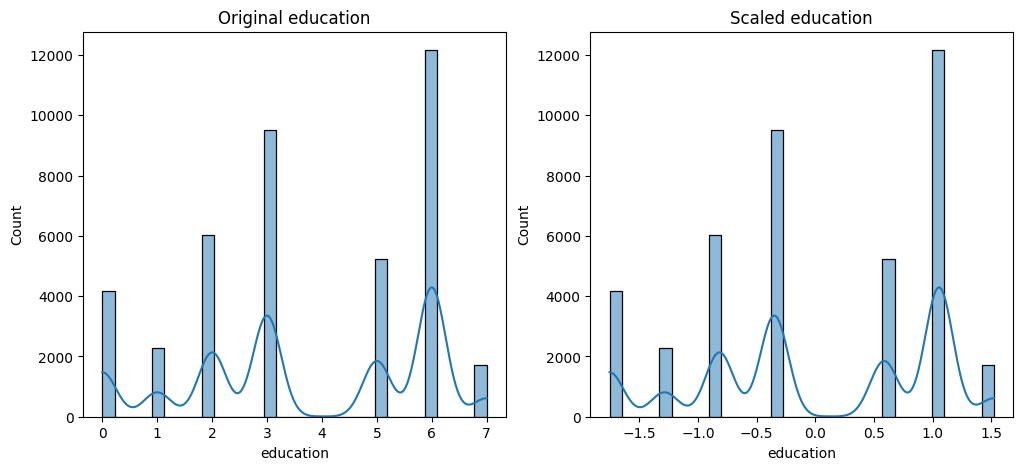

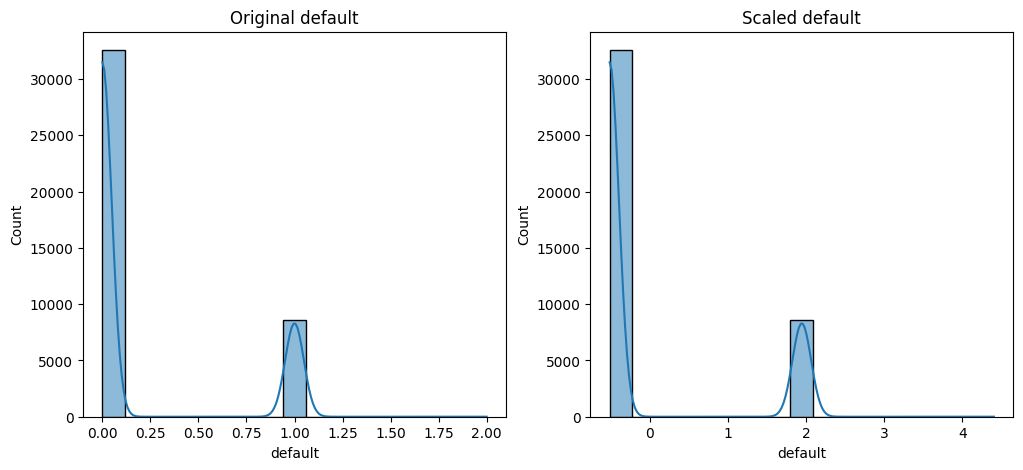

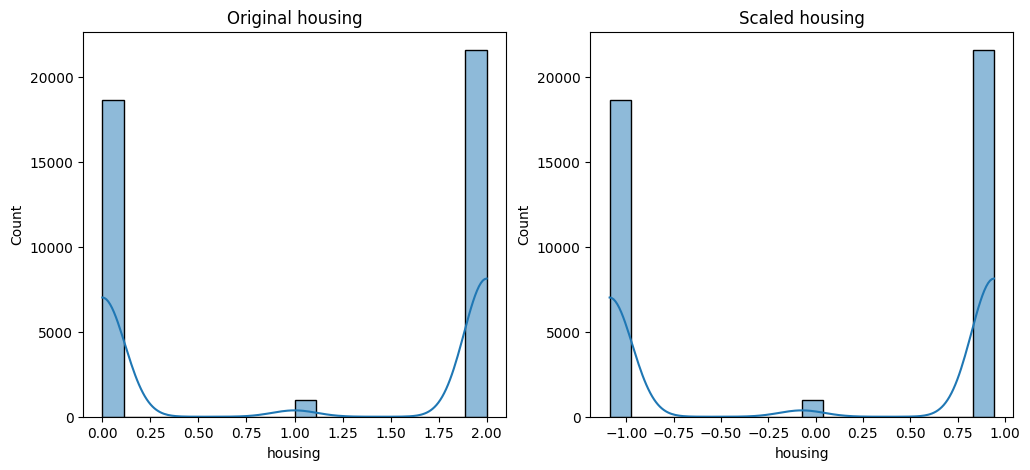

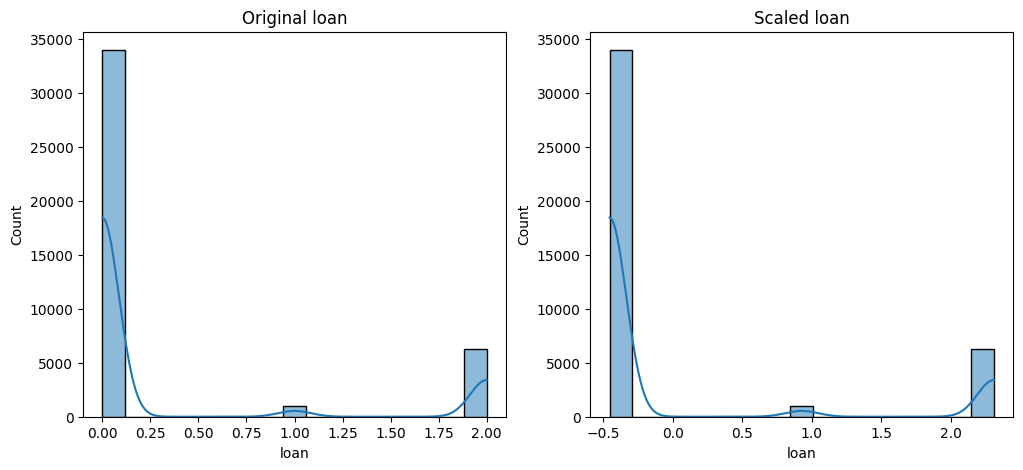

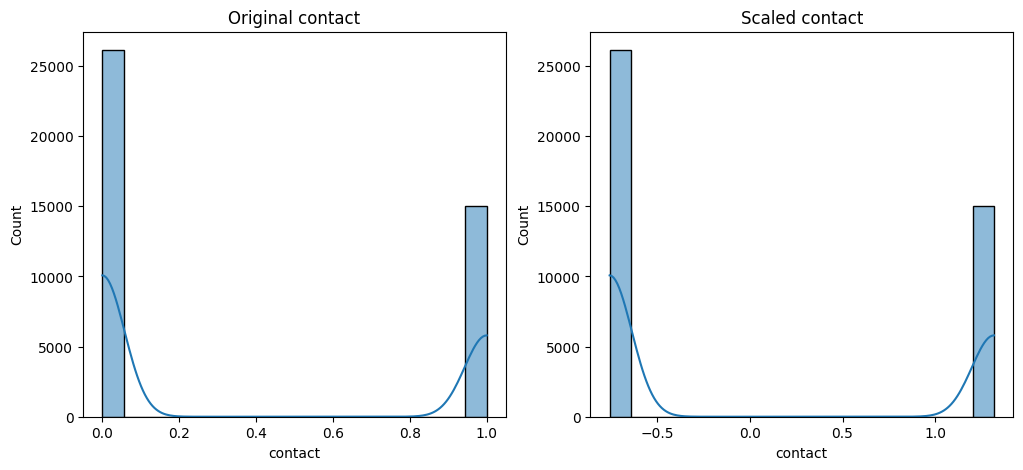

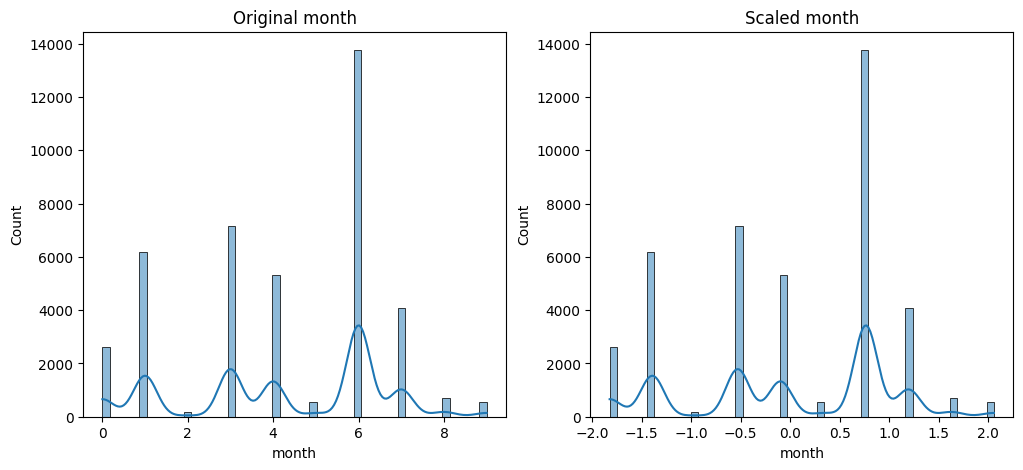

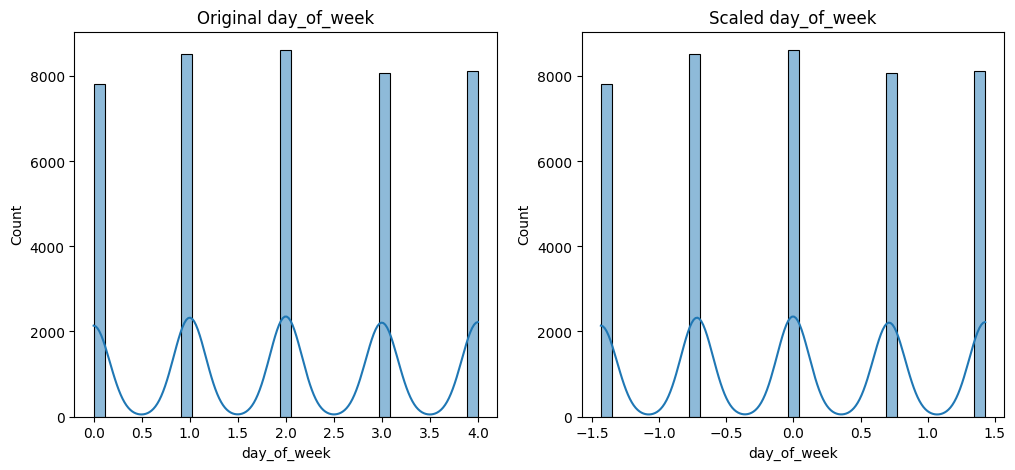

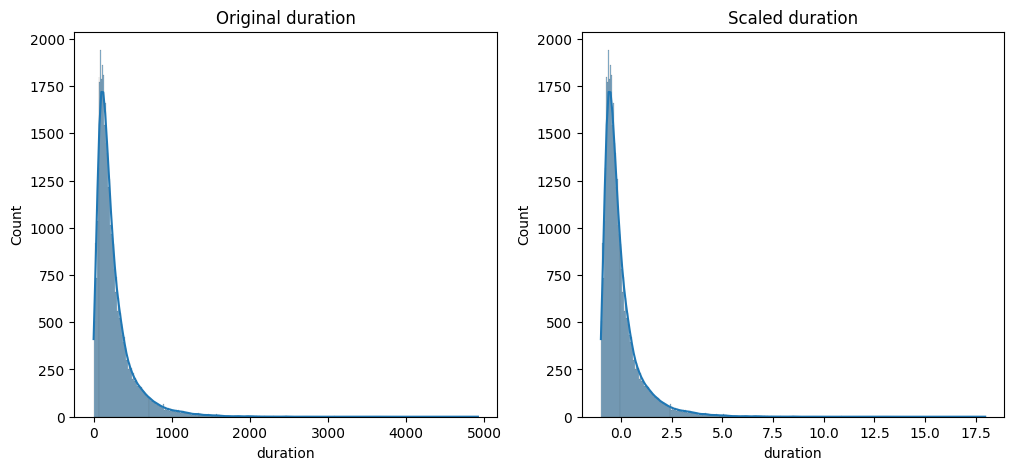

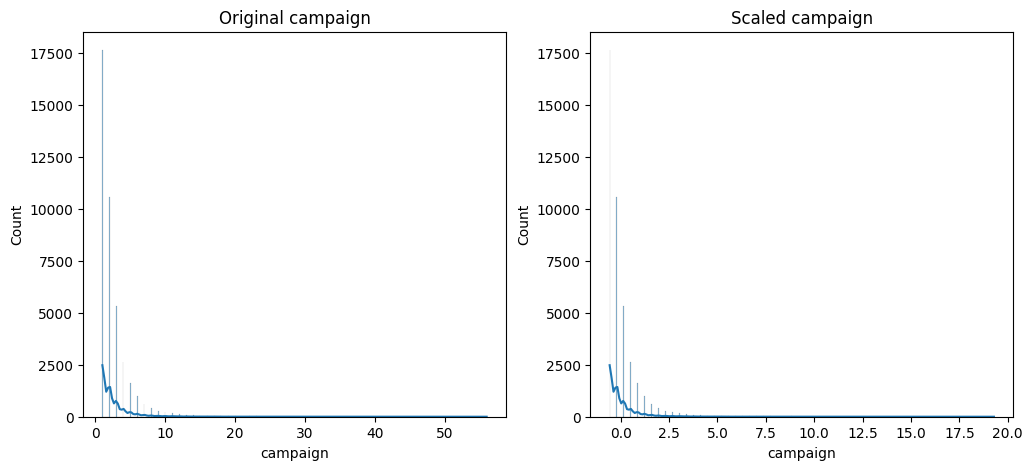

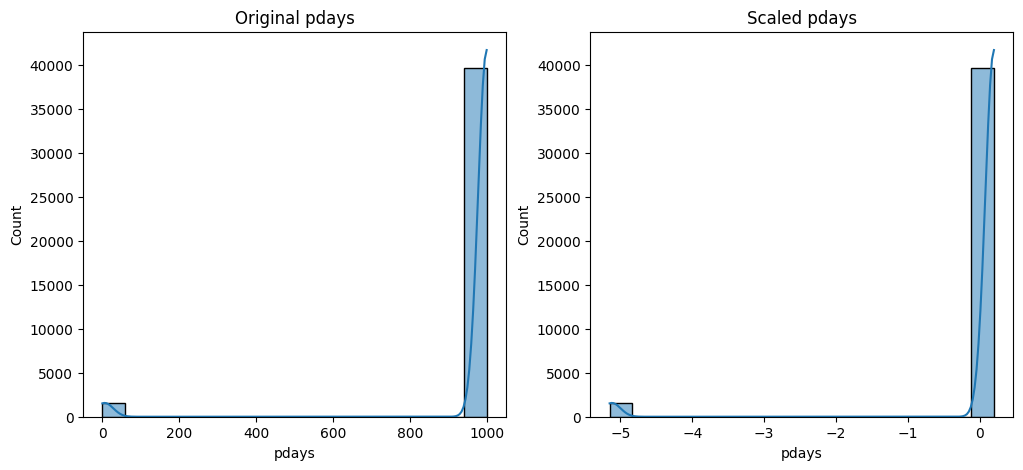

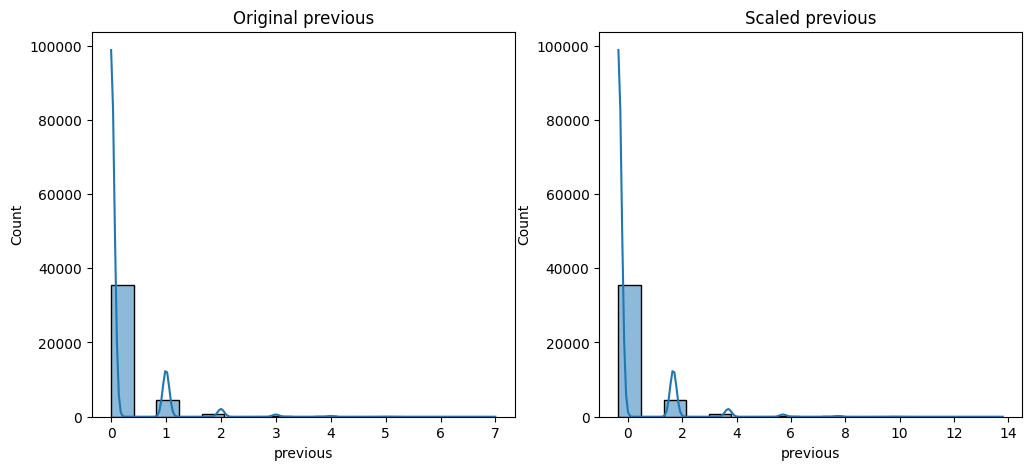

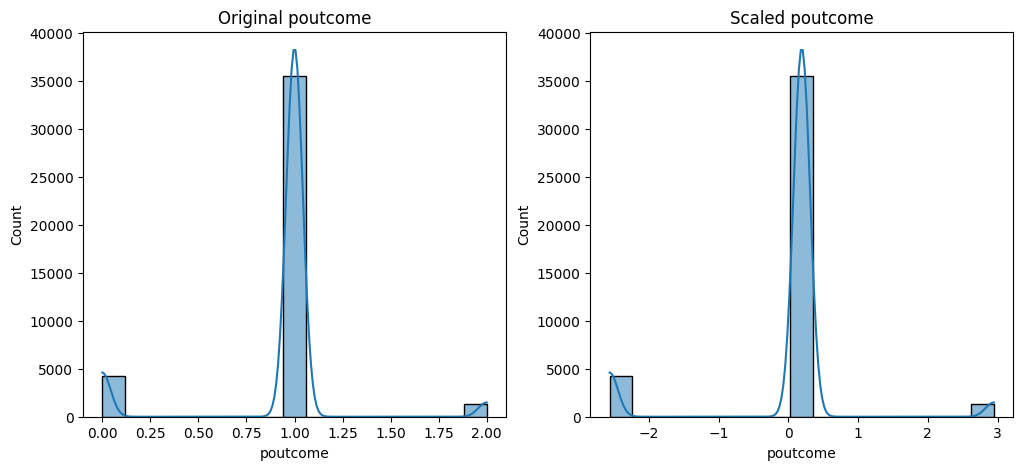

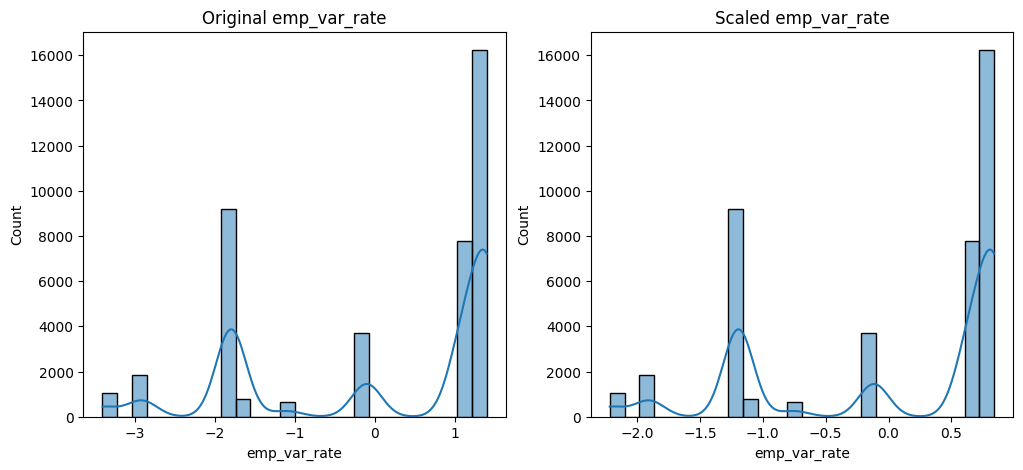

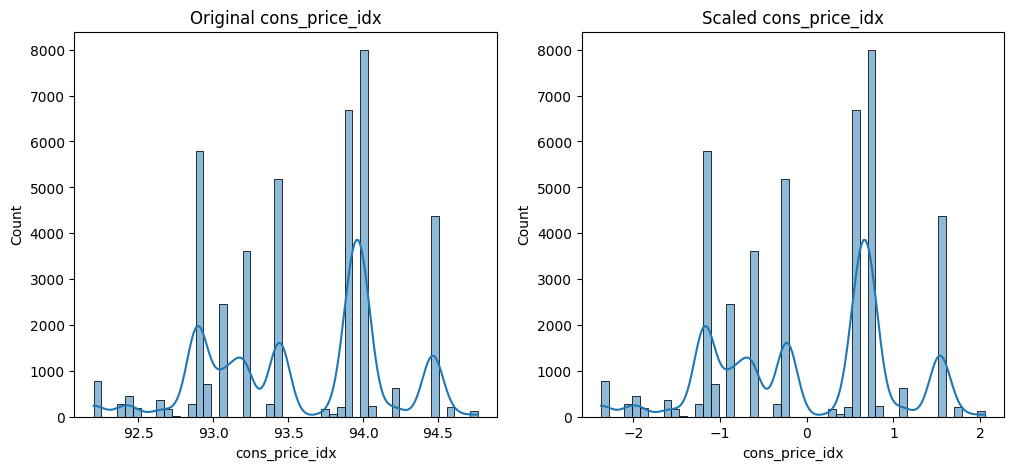

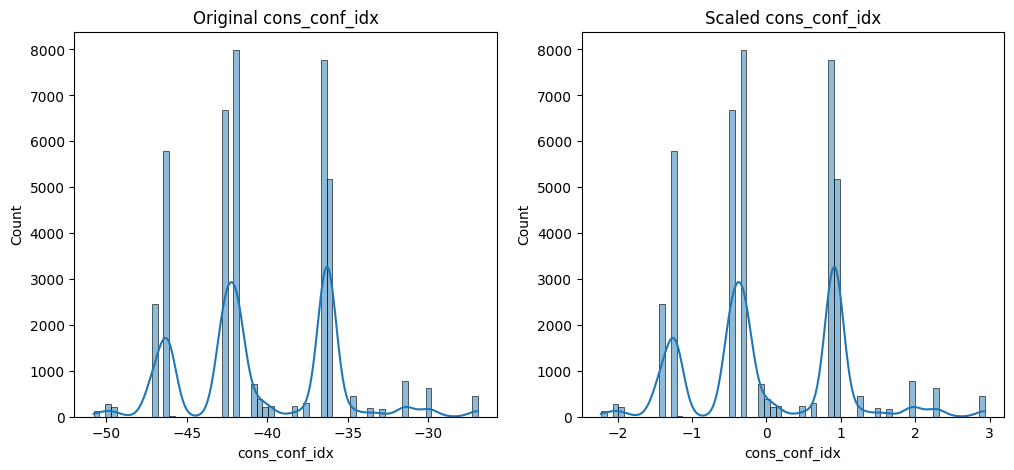

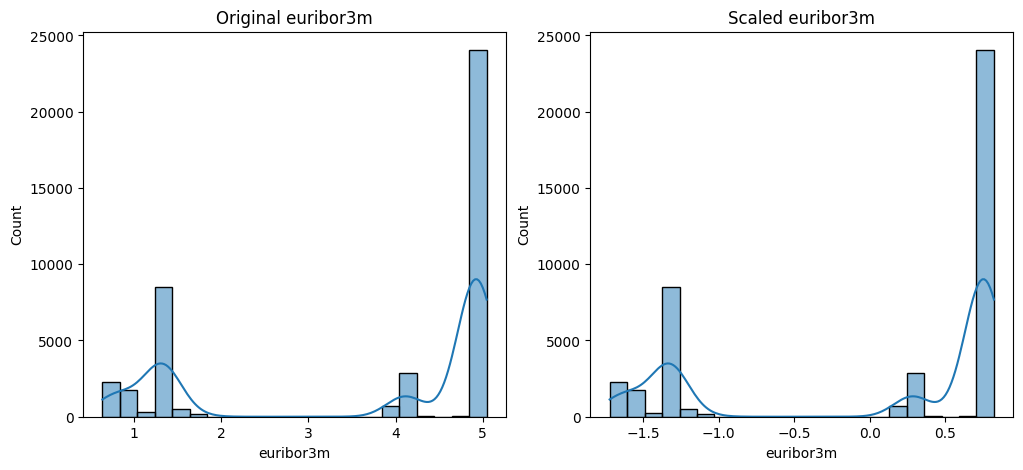

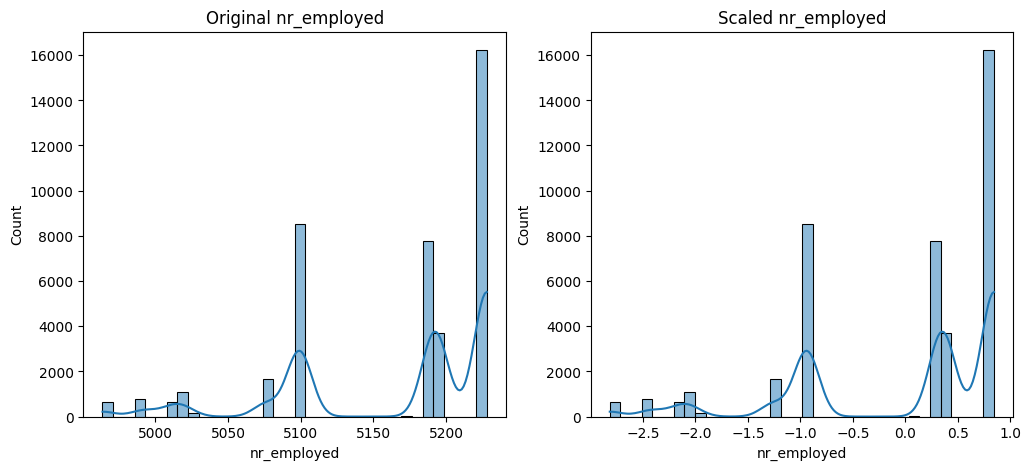

In [15]:
clean_bank_data_scaled_df = pd.DataFrame(clean_bank_data_scaled, columns=clean_bank_data.drop(columns=['y']).columns)

for column in clean_bank_data_scaled_df.columns:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(clean_bank_data[column], kde=True)
    plt.title(f'Original {column}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(clean_bank_data_scaled_df[column], kde=True)
    plt.title(f'Scaled {column}')
    
    plt.show()

### Apply PCA

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
clean_bank_data_pca = pca.fit_transform(clean_bank_data_scaled)
clean_bank_data_pca

array([[ 1.47167161,  0.17680011,  1.25733041, -1.56403477, -1.33722897],
       [-0.2991822 ,  0.12098202, -0.06645267, -0.66210229,  2.00866481],
       [-4.15634421, -5.25521173, -3.29649685, -0.17535468, -1.92929837],
       ...,
       [ 1.74078443, -0.56114115, -0.24574934,  1.0689102 , -0.17567522],
       [-2.73356821, -1.58092981,  0.54154358,  0.79251456,  3.25199261],
       [ 1.50450008, -0.31065047, -1.48988069,  1.92398198,  0.8530226 ]])

### Verify unique classes in the entire target variable before splitting

In [19]:
unique_classes_entire = np.unique(clean_bank_data['y'])
unique_classes_entire

array([0, 1])

### Split the dataset into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_bank_data_pca, clean_bank_data['y'], test_size=0.2, random_state=42)

#### Check the unique classes in y_train

In [22]:
unique_classes_train = np.unique(y_train)
unique_classes_train

array([0, 1])

### Train and evaluate a model


In [23]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model_name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#### Train and evaluate SVM

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm_model = SVC()
train_and_evaluate_model(svm_model, X_train, X_test, y_train, y_test, "SVM")

SVM Accuracy: 0.8963088878096164
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7316
           1       0.63      0.18      0.28       920

    accuracy                           0.90      8236
   macro avg       0.77      0.58      0.61      8236
weighted avg       0.87      0.90      0.87      8236

SVM Confusion Matrix:
 [[7220   96]
 [ 758  162]]


#### Train and evaluate Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
train_and_evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression") 

Logistic Regression Accuracy: 0.8957017969888296
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7316
           1       0.60      0.20      0.30       920

    accuracy                           0.90      8236
   macro avg       0.75      0.59      0.62      8236
weighted avg       0.87      0.90      0.87      8236

Logistic Regression Confusion Matrix:
 [[7192  124]
 [ 735  185]]


### Test the model

In [29]:
new_data = pd.DataFrame({
    'age': [45, 32, 29, 40, 35],
    'job': ['admin.', 'technician', 'blue-collar', 'services', 'management'],
    'marital': ['married', 'single', 'single', 'married', 'single'],
    'education': ['university.degree', 'high.school', 'basic.9y', 'basic.6y', 'university.degree'],
    'default': ['no', 'no', 'no', 'yes', 'no'],
    'housing': ['yes', 'no', 'no', 'yes', 'yes'],
    'loan': ['no', 'no', 'yes', 'no', 'no'],
    'contact': ['cellular', 'cellular', 'telephone', 'cellular', 'telephone'],
    'month': ['may', 'jun', 'aug', 'sep', 'oct'],
    'day_of_week': ['mon', 'wed', 'thu', 'fri', 'tue'],
    'duration': [100, 200, 150, 220, 300],
    'campaign': [1, 1, 2, 3, 4],
    'pdays': [999, 999, 999, 200, 300],
    'previous': [0, 0, 1, 3, 2],
    'poutcome': ['nonexistent', 'nonexistent', 'failure', 'success', 'failure'],
    'emp_var_rate': [1.1, -1.8, 0.1, -0.5, 0.3],
    'cons_price_idx': [93.994, 92.893, 94.465, 95.123, 94.500],
    'cons_conf_idx': [-36.4, -46.2, -33.6, -32.0, -30.0],
    'euribor3m': [4.857, 1.299, 4.021, 3.789, 3.900],
    'nr_employed': [5191.0, 5099.1, 5228.1, 5100.0, 5150.0]
})

new_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,45,admin.,married,university.degree,no,yes,no,cellular,may,mon,100,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,32,technician,single,high.school,no,no,no,cellular,jun,wed,200,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1
2,29,blue-collar,single,basic.9y,no,no,yes,telephone,aug,thu,150,2,999,1,failure,0.1,94.465,-33.6,4.021,5228.1
3,40,services,married,basic.6y,yes,yes,no,cellular,sep,fri,220,3,200,3,success,-0.5,95.123,-32.0,3.789,5100.0
4,35,management,single,university.degree,no,yes,no,telephone,oct,tue,300,4,300,2,failure,0.3,94.500,-30.0,3.900,5150.0


### Encode categorical features in the new data using the same label encoders

In [32]:
for column in categorical_columns:
    # Get the current label encoder
    le = label_encoders[column]
    
    # Check for unseen labels and assign a default value (e.g., -1)
    new_data[column] = new_data[column].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)


### Standardize the new data

In [33]:
new_data_scaled = scaler.transform(new_data)

### Apply PCA

In [35]:
new_data_pca = pca.transform(new_data_scaled)
new_data_pca

array([[ 0.0682547 ,  2.99359769,  2.93524416, -1.79184073,  1.22055004],
       [-3.25531342,  4.1743184 ,  2.83349893, -1.20606444,  0.16299774],
       [-0.43209837,  2.51564982,  2.20093837, -0.95297912,  1.06647148],
       [-2.89356857, -1.89220209,  2.17139241, -1.05681442,  0.43816985],
       [-1.9785798 , -0.81633599,  1.85112   , -1.37062206,  0.58629274]])

### Preprocessed new data:

In [37]:
print(new_data_pca)

[[ 0.0682547   2.99359769  2.93524416 -1.79184073  1.22055004]
 [-3.25531342  4.1743184   2.83349893 -1.20606444  0.16299774]
 [-0.43209837  2.51564982  2.20093837 -0.95297912  1.06647148]
 [-2.89356857 -1.89220209  2.17139241 -1.05681442  0.43816985]
 [-1.9785798  -0.81633599  1.85112    -1.37062206  0.58629274]]


###  Make predictions 
SVM Predictions for new data:

In [38]:
svm_predictions = svm_model.predict(new_data_pca)
print(svm_predictions)

for idx, prediction in enumerate(svm_predictions):
    if prediction == 1:
        print(f"Client {idx + 1}: Will subscribe to a term deposit.")
    else:
        print(f"Client {idx + 1}: Will not subscribe to a term deposit.")

[0 0 0 0 0]
Client 1: Will not subscribe to a term deposit.
Client 2: Will not subscribe to a term deposit.
Client 3: Will not subscribe to a term deposit.
Client 4: Will not subscribe to a term deposit.
Client 5: Will not subscribe to a term deposit.


#### Logistic Regression Predictions for new data:

In [39]:
lr_predictions = lr_model.predict(new_data_pca)
print(lr_predictions)

for idx, prediction in enumerate(lr_predictions):
    if prediction == 1:
        print(f"Client {idx + 1}: Will subscribe to a term deposit.")
    else:
        print(f"Client {idx + 1}: Will not subscribe to a term deposit.")

[0 0 0 0 0]
Client 1: Will not subscribe to a term deposit.
Client 2: Will not subscribe to a term deposit.
Client 3: Will not subscribe to a term deposit.
Client 4: Will not subscribe to a term deposit.
Client 5: Will not subscribe to a term deposit.
